In [48]:
import keras
from keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [49]:
input_img = keras.Input(shape=(28, 28, 1))

In [50]:
# Encoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

In [51]:
# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

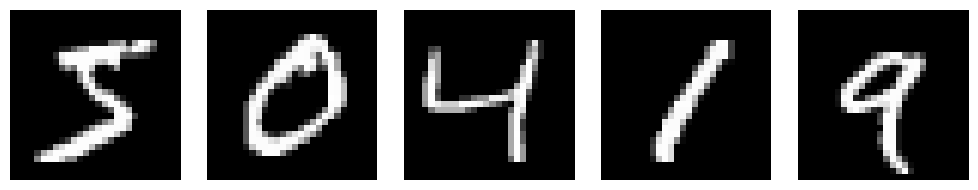

In [52]:
# Definição do modelo
autoencoder = keras.Model(input_img, decoded)
# Usando Mean Squared Error como função de perda e reduzindo a taxa de aprendizado
autoencoder.compile(optimizer= Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

n = 5
plt.figure(figsize=(10, 2))

for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [53]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - accuracy: 0.7342 - loss: 0.5582 - val_accuracy: 0.7845 - val_loss: 0.2373
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.7875 - loss: 0.2157 - val_accuracy: 0.7957 - val_loss: 0.1771
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.7981 - loss: 0.1709 - val_accuracy: 0.7999 - val_loss: 0.1542
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.8017 - loss: 0.1513 - val_accuracy: 0.8030 - val_loss: 0.1398
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.8047 - loss: 0.1389 - val_accuracy: 0.8049 - val_loss: 0.1317
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.8065 - loss: 0.1311 - val_accuracy: 0.8061 - val_loss: 0.1262
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.8071 - loss: 0.1266 - val_accuracy: 0.8076 - val_loss: 0.1225
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.8079 - loss: 0.1228 - 

In [43]:
# Avaliar o modelo com os testes
test_loss, test_accuracy = autoencoder.evaluate(x_test, x_test) # As entradas e as saídas devem ser iguais (reconstrução)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8125 - loss: 0.1302


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Métricas para o Autoencoder com a base MNIST:
Média do Erro Quadrático (MSE): 0.023175
Erro Absoluto Médio (MAE): 0.061808
Valores mínimos e máximos das imagens reconstruídas:
2.575504e-22 0.99770635


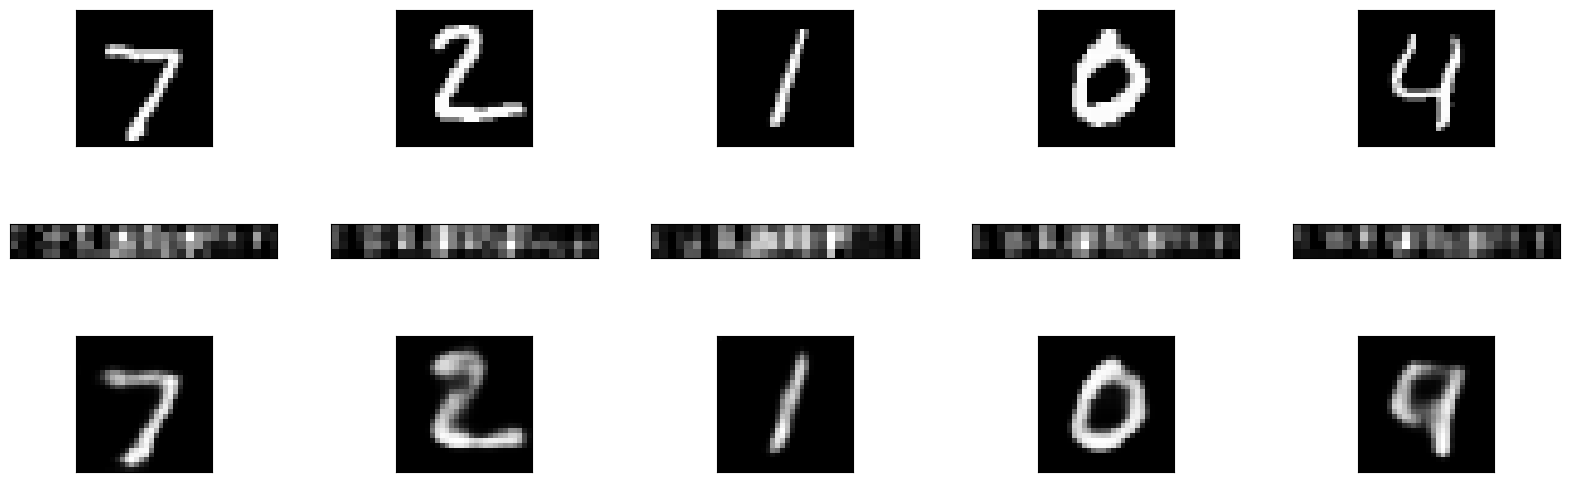

In [46]:
# Reconstrução e visualização das imagens
# Definir um modelo para o encoder
encoder_model = keras.Model(input_img, encoded)
encoded_imgs = encoder_model.predict(x_test)

decoded_imgs = autoencoder.predict(x_test)

# Calcular MSE e MAE para as imagens reconstruídas
mse_list = []
mae_list = []

for i in range(len(x_test)):
    original = x_test[i].flatten()
    reconstructed = decoded_imgs[i].flatten()
    
    mse_list.append(mean_squared_error(original, reconstructed))
    mae_list.append(mean_absolute_error(original, reconstructed))

# Média geral
mse_mean = np.mean(mse_list)
mae_mean = np.mean(mae_list)

# Exibir os resultados
print("Métricas para o Autoencoder com a base MNIST:")
print(f"Média do Erro Quadrático (MSE): {mse_mean:.6f}")
print(f"Erro Absoluto Médio (MAE): {mae_mean:.6f}")

# Verificar os valores das imagens reconstruídas
print("Valores mínimos e máximos das imagens reconstruídas:")
print(decoded_imgs.min(), decoded_imgs.max())

# Exibir as representações codificadas
n = 5  # Número de imagens para exibir
plt.figure(figsize=(20, 6))

for i in range(n):
    # Mostrar imagem original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Mostrar imagem codificada (saída do encoder)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8))  # Ajuste o reshape conforme a saída do encoder
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Mostrar imagem reconstruída
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

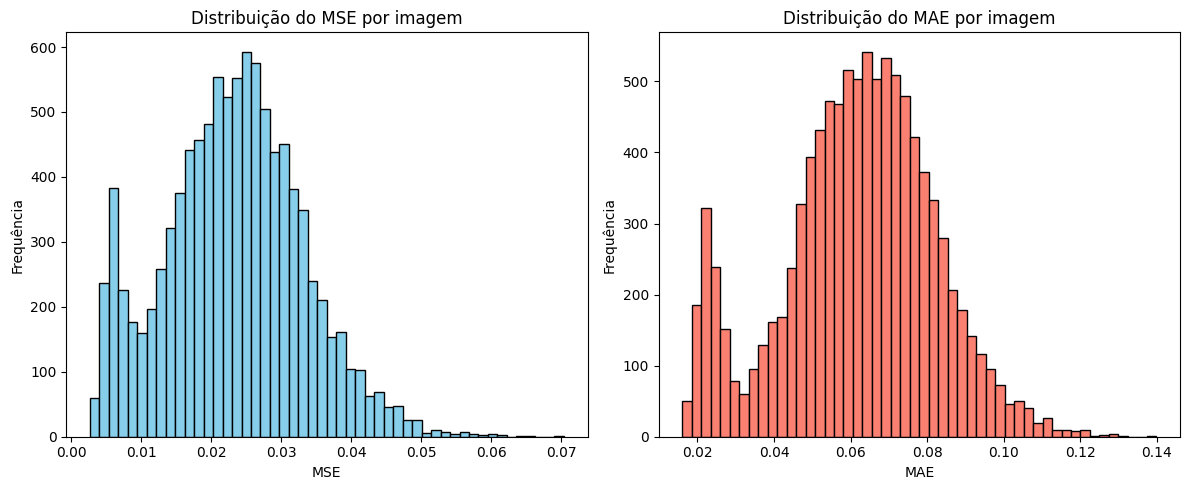

In [47]:
# Visualizar as distribuições dos erros
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(mse_list, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribuição do MSE por imagem")
plt.xlabel("MSE")
plt.ylabel("Frequência")

plt.subplot(1, 2, 2)
plt.hist(mae_list, bins=50, color='salmon', edgecolor='black')
plt.title("Distribuição do MAE por imagem")
plt.xlabel("MAE")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()